In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from scipy.stats import mode

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
import category_encoders

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.4 MB/s eta 0:00:00


In [ ]:
imported= files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015 (1).csv to diabetes_binary_health_indicators_BRFSS2015 (1).csv


In [ ]:
df= pd.read_csv(io.BytesIO(imported['diabetes_binary_health_indicators_BRFSS2015 (1).csv']))

In [ ]:
#No missing values
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
#Code as integer
for i in df:
  df[i]=df[i].astype(int)

In [ ]:
#Exploratory Analysis of binary variables
for i in df:
  if len(set(df[i]))==2:
    print(f'Proportion of {i} = 1:',len(df[df[i]==1])/len(df))

Proportion of Diabetes_binary = 1: 0.13933301797540207
Proportion of HighBP = 1: 0.4290011037527594
Proportion of HighChol = 1: 0.4241209397666351
Proportion of CholCheck = 1: 0.9626695048880479
Proportion of Smoker = 1: 0.44316855881425415
Proportion of Stroke = 1: 0.04057079785556607
Proportion of HeartDiseaseorAttack = 1: 0.09418558814254178
Proportion of PhysActivity = 1: 0.7565436770734784
Proportion of Fruits = 1: 0.6342557552822453
Proportion of Veggies = 1: 0.811419899085462
Proportion of HvyAlcoholConsump = 1: 0.05619678334910123
Proportion of AnyHealthcare = 1: 0.9510525070955534
Proportion of NoDocbcCost = 1: 0.08417691579943236
Proportion of DiffWalk = 1: 0.16822374645222327
Proportion of Sex = 1: 0.4403421633554084


In [ ]:
#Exploratory Analysis of Numeric Variables
numeric_vars=['BMI','MentHlth','PhysHlth']
for i in numeric_vars:
  print(i, '\n',df[i].describe(),'\n')

BMI 
 count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64 

MentHlth 
 count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64 

PhysHlth 
 count    253680.000000
mean          4.242081
std           8.717951
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysHlth, dtype: float64 



In [ ]:
#Exploratory Analysis of multicategory ordinal variables
for i in df:
  if len(set(df[i]))!=2 and i not in numeric_vars:
    print('\n',i,'\n')
    for v in set(df[i]):
      print(f'Proportion when {i}={v}', len(df[df[i]==v])/len(df))


 GenHlth 

Proportion when GenHlth=1 0.1785674865972879
Proportion when GenHlth=2 0.3511668243456323
Proportion when GenHlth=3 0.29819457584358244
Proportion when GenHlth=4 0.12444812362030905
Proportion when GenHlth=5 0.04762298959318827

 Age 

Proportion when Age=1 0.022469252601702933
Proportion when Age=2 0.029951119520655944
Proportion when Age=3 0.04384657836644592
Proportion when Age=4 0.054489908546199936
Proportion when Age=5 0.06369047619047619
Proportion when Age=6 0.07812598549353517
Proportion when Age=7 0.10372910753705455
Proportion when Age=8 0.12153894670450961
Proportion when Age=9 0.13104698833175654
Proportion when Age=10 0.12690791548407443
Proportion when Age=11 0.09276647745190791
Proportion when Age=12 0.06299274676758121
Proportion when Age=13 0.06844449700409966

 Education 

Proportion when Education=1 0.0006859035004730369
Proportion when Education=2 0.015937401450646482
Proportion when Education=3 0.03736203090507726
Proportion when Education=4 0.24735887

In [ ]:
#Split data into Train, Test and Validation sets (60-20-20 split)
train= df.sample(frac=0.6, random_state=50)
other= df.drop(train.index)
test= other.sample(frac=0.5, random_state=50)
validation= other.drop(test.index)

In [ ]:
#Define X_train, Y_train, X_test, Y_test, X_validation, Y_validation
Y_train= train['Diabetes_binary']
X_train=train.drop('Diabetes_binary', axis=1)
Y_validation= validation['Diabetes_binary']
X_validation=validation.drop('Diabetes_binary', axis=1)
Y_test= test['Diabetes_binary']
X_test=test.drop('Diabetes_binary', axis=1)

In [ ]:
for i in df:
  print(i)

Diabetes_binary
HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income


In [ ]:
scaler= StandardScaler()

In [ ]:
#Use standard scaler to scale numeric variables
X_train[['BMI','MentHlth','PhysHlth']]= scaler.fit_transform(X_train[['BMI','MentHlth','PhysHlth']])
X_test[['BMI','MentHlth','PhysHlth']]= scaler.transform(X_test[['BMI','MentHlth','PhysHlth']])
X_validation[['BMI','MentHlth','PhysHlth']]= scaler.transform(X_validation[['BMI','MentHlth','PhysHlth']])

In [ ]:
#Explore class imbalance in training set. Imbalance appears to be significant.
len(train[train['Diabetes_binary']==1])/len(train)

0.13967728371701882

In [ ]:
#Use SMOTE to oversample the minority class in the training set
smote=SMOTE(random_state=50)
X_train_oversampled, Y_train_oversampled= smote.fit_resample(X_train, Y_train)

# XGBoost

Model 1, begin with a radom set of values for hyperparameters

In [ ]:
model= XGBClassifier(n_estimators=20, max_depth=20, learning_rate=0.1,reg_lambda=0.5)

In [ ]:
model.fit(X_train_oversampled, Y_train_oversampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6656249315380033
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     43720
           1       0.37      0.46      0.41      7016

    accuracy                           0.82     50736
   macro avg       0.64      0.67      0.65     50736
weighted avg       0.83      0.82      0.83     50736



Model 1a, Increase number of trees.

In [ ]:
model= XGBClassifier(n_estimators=100, max_depth=20, learning_rate=0.1,reg_lambda=0.5)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6176533235756514
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     43720
           1       0.40      0.31      0.35      7016

    accuracy                           0.84     50736
   macro avg       0.65      0.62      0.63     50736
weighted avg       0.82      0.84      0.83     50736



Model 1b, Decrease the learning rate.

In [ ]:
model= XGBClassifier(n_estimators=20, max_depth=20, learning_rate=0.05,reg_lambda=0.5)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6680918976465765
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     43720
           1       0.35      0.48      0.41      7016

    accuracy                           0.81     50736
   macro avg       0.63      0.67      0.65     50736
weighted avg       0.83      0.81      0.82     50736



Model 1c, decrease lambda.

In [ ]:
model= XGBClassifier(n_estimators=20, max_depth=20, learning_rate=0.1,reg_lambda=0.01)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6598937104680871
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     43720
           1       0.37      0.44      0.40      7016

    accuracy                           0.82     50736
   macro avg       0.64      0.66      0.65     50736
weighted avg       0.83      0.82      0.82     50736



Model 1d, increase max_depth.

In [ ]:
model= XGBClassifier(n_estimators=20, max_depth=100, learning_rate=0.1,reg_lambda=0.5)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6196694967769396
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     43720
           1       0.35      0.34      0.35      7016

    accuracy                           0.82     50736
   macro avg       0.62      0.62      0.62     50736
weighted avg       0.82      0.82      0.82     50736



Model 1e, decrease learning rate by more

In [ ]:
model= XGBClassifier(n_estimators=20, max_depth=20, learning_rate=0.01,reg_lambda=0.5)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6657792905198522
              precision    recall  f1-score   support

           0       0.91      0.84      0.87     43720
           1       0.33      0.49      0.39      7016

    accuracy                           0.79     50736
   macro avg       0.62      0.67      0.63     50736
weighted avg       0.83      0.79      0.81     50736



Model 1f, Set learning rate to 0.05 and decrease max depth

In [ ]:
model= XGBClassifier(n_estimators=20, max_depth=10, learning_rate=0.05,reg_lambda=0.5)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.7093041679141964
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     43720
           1       0.34      0.61      0.43      7016

    accuracy                           0.78     50736
   macro avg       0.63      0.71      0.65     50736
weighted avg       0.85      0.78      0.80     50736



Model 1g, Set learning rate to 0.05, max depth to 10, and increase lambda

In [ ]:
model= XGBClassifier(n_estimators=20, max_depth=10, learning_rate=0.05,reg_lambda=10)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.7101346836560218
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     43720
           1       0.34      0.61      0.44      7016

    accuracy                           0.78     50736
   macro avg       0.63      0.71      0.65     50736
weighted avg       0.85      0.78      0.80     50736



Model 1h, Set learning rate to 0.05, max depth to 10, lambda to 10, and decrease the number of estimators

In [ ]:
model= XGBClassifier(n_estimators=10, max_depth=10, learning_rate=0.05,reg_lambda=10)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.7013098149204903
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     43720
           1       0.33      0.59      0.43      7016

    accuracy                           0.78     50736
   macro avg       0.63      0.70      0.65     50736
weighted avg       0.84      0.78      0.80     50736



Model 1i, Set learning rate to 0.05, max depth to 10, lambda to 10, and slightly increase the number of estimators

In [ ]:
model= XGBClassifier(n_estimators=25, max_depth=10, learning_rate=0.05,reg_lambda=10)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_test)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.7164863269004266
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     43720
           1       0.34      0.63      0.44      7016

    accuracy                           0.78     50736
   macro avg       0.64      0.72      0.65     50736
weighted avg       0.85      0.78      0.80     50736



# Additive XGBoost

In [ ]:
#Define the function for an additive XGBoost Classifier
def additive_xgbc(model):
  list_predictions=[]
  for i in X_train_oversampled:
    predictor=X_train_oversampled[[i]]
    model.fit(predictor, Y_train_oversampled)
    predicted=model.predict(X_test[[i]])
    list_predictions.append(predicted)
  array_predictions=np.array(list_predictions)
  mode_pred= mode(array_predictions, axis=0).mode.flatten()
  return mode_pred

Model 2, begin with a radom set of values for hyperparameters

In [ ]:
model= XGBClassifier(n_estimators=20, learning_rate=0.1,reg_lambda=0.5)

In [ ]:
predicted= additive_xgbc(model)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6969203968239893
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     43720
           1       0.28      0.66      0.40      7016

    accuracy                           0.72     50736
   macro avg       0.61      0.70      0.61     50736
weighted avg       0.84      0.72      0.76     50736



model 2a, Increase number of estimators

In [ ]:
model= XGBClassifier(n_estimators=100, learning_rate=0.1,reg_lambda=0.5)

In [ ]:
predicted= additive_xgbc(model)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.68667785618234
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     43720
           1       0.29      0.62      0.39      7016

    accuracy                           0.74     50736
   macro avg       0.61      0.69      0.61     50736
weighted avg       0.84      0.74      0.77     50736



Model 2b, Decrease the learning rate.

In [ ]:
model= XGBClassifier(n_estimators=20, learning_rate=0.05,reg_lambda=0.5)
predicted= additive_xgbc(model)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.698468642058252
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     43720
           1       0.28      0.68      0.40      7016

    accuracy                           0.71     50736
   macro avg       0.61      0.70      0.60     50736
weighted avg       0.84      0.71      0.76     50736



Model 2c, decrease lambda.

In [ ]:
model= XGBClassifier(n_estimators=20,learning_rate=0.1,reg_lambda=0.01)
predicted= additive_xgbc(model)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6969203968239893
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     43720
           1       0.28      0.66      0.40      7016

    accuracy                           0.72     50736
   macro avg       0.61      0.70      0.61     50736
weighted avg       0.84      0.72      0.76     50736



Model 2d, decrease learning rate by more

In [ ]:
model= XGBClassifier(n_estimators=20, learning_rate=0.01,reg_lambda=0.5)
predicted= additive_xgbc(model)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6963058689014053
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     43720
           1       0.27      0.70      0.39      7016

    accuracy                           0.69     50736
   macro avg       0.60      0.70      0.59     50736
weighted avg       0.84      0.69      0.74     50736



Model 2e, Set learning rate to 0.05, and increase lambda

In [ ]:
model= XGBClassifier(n_estimators=20, learning_rate=0.05,reg_lambda=10)
predicted= additive_xgbc(model)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.698468642058252
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     43720
           1       0.28      0.68      0.40      7016

    accuracy                           0.71     50736
   macro avg       0.61      0.70      0.60     50736
weighted avg       0.84      0.71      0.76     50736



Model 2f, Set learning rate to 0.05 and lambda to 10, and decrease the number of estimators

In [ ]:
model= XGBClassifier(n_estimators=10, learning_rate=0.05,reg_lambda=10)
predicted= additive_xgbc(model)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.7013841711690754
              precision    recall  f1-score   support

           0       0.94      0.71      0.81     43720
           1       0.28      0.69      0.40      7016

    accuracy                           0.71     50736
   macro avg       0.61      0.70      0.60     50736
weighted avg       0.84      0.71      0.75     50736



Model 2g, Set learning rate to 0.05 and lambda to 10, and slightly increase the number of estimators

In [ ]:
model= XGBClassifier(n_estimators=25, learning_rate=0.05,reg_lambda=10)
predicted= additive_xgbc(model)

In [ ]:
print('auc_score',roc_auc_score(Y_test, predicted))
print(classification_report(Y_test, predicted))

auc_score 0.6983964244320392
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     43720
           1       0.28      0.67      0.40      7016

    accuracy                           0.72     50736
   macro avg       0.61      0.70      0.61     50736
weighted avg       0.84      0.72      0.76     50736



# Best Model Performance on Validation Set and Variable Importance Metrics

Performance on Validation Set

In [ ]:
model= XGBClassifier(n_estimators=25, max_depth=10, learning_rate=0.05,reg_lambda=10)
model.fit(X_train_oversampled, Y_train_oversampled)
predicted= model.predict(X_validation)

In [ ]:
print('auc_score',roc_auc_score(Y_validation, predicted))
print(classification_report(Y_validation, predicted))

auc_score 0.7182296260588363
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     43666
           1       0.34      0.63      0.45      7070

    accuracy                           0.78     50736
   macro avg       0.64      0.72      0.65     50736
weighted avg       0.85      0.78      0.80     50736



Variable Importance based on AUC score using permutation

In [ ]:
baseline_auc= roc_auc_score(Y_validation, predicted)

In [ ]:
list_vars=[]
list_var_imp=[]
for i in X_train_oversampled:
  df_shuffled= X_train_oversampled.copy()
  df_shuffled[i]= np.random.permutation(X_train_oversampled[i])
  model.fit(df_shuffled, Y_train_oversampled)
  pred_s=model.predict(X_validation)
  new_auc= roc_auc_score(Y_validation, pred_s)
  var_importance= new_auc - baseline_auc
  list_vars.append(i)
  list_var_imp.append(var_importance)

In [ ]:
array_vars= np.array(list_vars)
array_var_imp=np.array(list_var_imp)
df_var_imp= pd.DataFrame(array_vars, columns=['Predictor'])
df_var_imp['Importance (AUC)']= array_var_imp
print(df_var_imp.sort_values(by='Importance (AUC)', ascending=True))

               Predictor  Importance (AUC)
13               GenHlth         -0.028945
0                 HighBP         -0.021216
18                   Age         -0.009871
10     HvyAlcoholConsump         -0.006227
1               HighChol         -0.004020
3                    BMI         -0.003649
19             Education         -0.001517
12           NoDocbcCost         -0.001138
6   HeartDiseaseorAttack         -0.000084
11         AnyHealthcare          0.000315
2              CholCheck          0.000348
16              DiffWalk          0.000355
8                 Fruits          0.000363
15              PhysHlth          0.000693
17                   Sex          0.000726
5                 Stroke          0.000952
20                Income          0.001109
7           PhysActivity          0.001242
14              MentHlth          0.001849
4                 Smoker          0.002708
9                Veggies          0.003430


Shapley Values

100%|===================| 50642/50736 [04:15<00:00]       

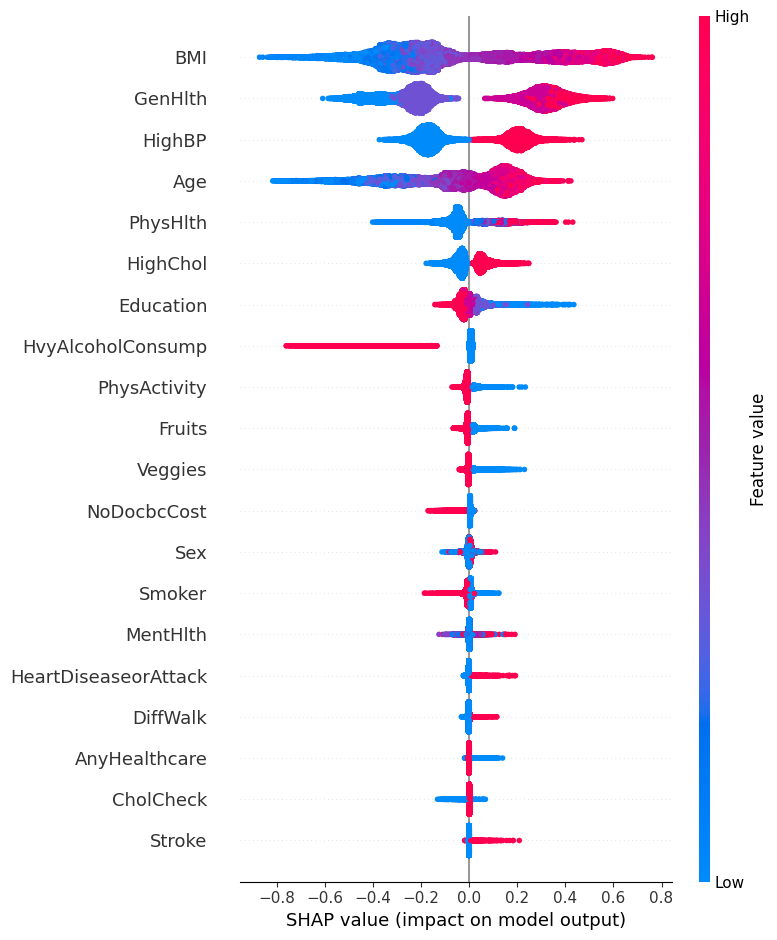

In [ ]:
explainer = shap.Explainer(model, X_validation)
shap_values = explainer.shap_values(X_validation)
shap.summary_plot(shap_values, X_validation)